In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [52]:
df = pd.read_csv('datasets/students_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


So,there is no null values in our dataset and the data type of both feature are also correct. we don't need to change it.

### Visualize tha data

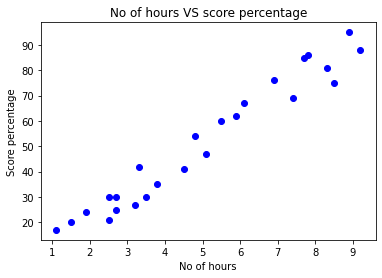

In [37]:
plt.title('No of hours VS score percentage')
plt.xlabel('No of hours')
plt.ylabel('Score percentage')
plt.scatter(df.Hours, df.Scores, color = 'blue', marker = 'o')
plt.show()

In [15]:
#Now predicting the score using sklearn
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [16]:
#spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# creating a linear object for regression
reg_ = LinearRegression()
reg_.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = reg_.predict(X_test)

In [39]:
# As the linear equation is y = mx + b where m is slope or gradient and b is the intercept 
print(f'co-efficent: {reg_.coef_[0]}')
print(f'Intercept: {reg_.intercept_}')

co-efficent: 9.91065648064224
Intercept: 2.018160041434662


In [44]:
# we can also check the linear line for the above data set using the formula.
m = reg_.coef_
b = reg_.intercept_
linear_eq = m * X + b
print(linear_eq)

[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


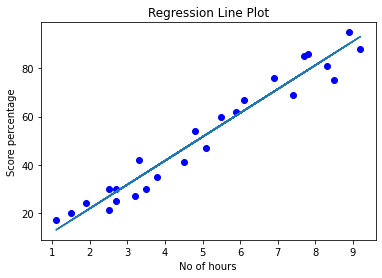

In [51]:
plt.title('Regression Line Plot')
plt.xlabel('No of hours')
plt.ylabel('Score percentage')
plt.scatter(df.Hours, df.Scores, color = 'blue', marker = 'o')
plt.plot(X, linear_eq)
plt.show()

In [20]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1    

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


###### What will be predicted score if a student studies for 9.25 hrs/ day?

In [30]:
hours = [[9.25]]
val_predict = reg_.predict(hours)
print(f'If a student who studies for {hours[0][0]} he would score {val_predict[0]}')

If a student who studies for 9.25 he would score 93.69173248737539


##### checking for the error

In [48]:
print('Mean absoulte error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean absoulte error: 4.183859899002982
Mean squared error: 21.598769307217456
Root mean squared error: 2.0454485813637513
